# NAC3 - Aprendizado de maquina

Nesta nac vamos desenvolver um modelo preditivo do valor do carro.


Dica: Siga todas as instruções, completando e construindo os algoritmos necessários.

Nas celulas **Seu Código aqui...** significa que é necessário realizar a implementação de algum código. Utilize quantos blocos julgar necessário para criar o código.

Nas celulas **Responda** significa que é nessário uma resposta clara e objetiva (pode ser por texto, gráfico, imagem...) para a pergunta.


## Informações do grupo

Este projeto poderá ser feito por grupos de `até 2 alunos`.

| Nome dos Integrantes     | RM             | Turma   |
| :----------------------- | :------------- | :-----: |
| Freddy Ramos Zenteno     | RM             |  81590  |
| Vitor Kazuhiro Yakushiji | RM             |  80572  |


## Data de entrega final

Será considerado para avaliação e correção o ultimo commit do `**dia 16/09/2021**`

Responda o `Google forms` :   [LINK FORMULARIO](https://forms.gle/2iivfbMVToXwe9Wc6).


## Rubrica 

Os critérios de avaliação do projeto será conforme a rubrica.


- R1: Exploração de Dados (Até 1 ponto)
- R2: Preparação de Dados (Até 2 ponto)
- R3: Desenvolvimento do Modelo (Até 2 ponto)
- R4: Treinamento e Teste do Modelo (Até 1 ponto)
- R5: Validação e Otimização do Modelo (Até 2 ponto)
- R6: Conclusões Finais (Até 2 ponto)

Nota_final = R1 + R2 + R3 + R4 + R5 + R6

## Previsão do valor do carro


## 1. Exploração de Dados

Os dados que serão utilizados extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

Carregue o dataset "Automobile.csv" e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
#Seu Código aqui...
car_df = pd.read_csv('dataset/Automobile.csv')
car_df.head(15)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,168,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [3]:
car_df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'number_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

In [5]:
car_df['price'].value_counts()

8921     2
18150    2
8845     2
8495     2
7609     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 186, dtype: int64

In [6]:
car_df.describe()
#mean = média 
#std = desvio padrão
#25% = primeiro quartil
#50% = mediana
#75% = terceiro quartil
#Pega somente valores númericos

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,125.189055,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.329701,3.261741,10.164279,103.263682,5121.393035,25.179104,30.686567,13207.129353
std,1.254802,33.572966,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268166,0.317875,4.004965,37.389372,479.624905,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


**Pergunta:** Apresente uma relação das coluna e seu significado:

Exemplo: 

- make: fabricante
- fuel_type: tipo de combustível
- price: preço (**Variável Alvo, atributo que será predito pelo modelo de ML**)

**Responda**
 <center>
 'symboling' <br>
 'normalized_losses' = Perdas normalizadas <br>
 'make', = Nome do Fabricante<br>
 'fuel_type' = Tipo de combustível do carro <br>
 'aspiration'= Caso motor aspirado ou turbo<br>
 'number_of_doors' = Quantidade de portas<br>
 'body_style' = Categoria do carro<br>
 'drive_wheels' = Tração do carro dianteira traseira ou 4x4<br>
 'engine_location' = Onde o motor se localiza<br>
 'wheel_base' = Ditância entre os eixos <br>
 'length'= Cumprimento do carro <br>
 'width' = Largura do carro<br>
 'height' = Altura do carro <br>
 'curb_weight' = Peso do veículo sem nenhuma pssageiro dentro <br>
 'engine_type' = tecnologia do motor<br>
 'number_of_cylinders' = Quantidade de cilíndros <br>
 'engine_size' = Tamanho do motor <br>
 'fuel_system' = Sistemas de combustível <br>
 'bore' = Diâmetro de cada cilindro<br>
 'stroke' = Movimento do pistão distância da rotação<br>
 'compression_ratio' = Taxa de compressão de combustão do veículo<br>
 'horsepower' = Quantidade de força em cavalos <br>
 'peak_rpm', = Tipo de rotação<br>
 'city_mpg' = Distância percorrida em milhas por galão de combustível na cidade<br>
 'highway_mpg'= Distância percorrida em milhas por galão de combustível na rodovia<br>
 'price' =  Target valor Dependente Valor do carro
 </center>

### Análise profunda dos dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos e levante algumas suposições. 

In [7]:
corr_df = car_df.corr()
print("Correlação dos dados no DataFrame :")
print(corr_df, "\n")

Correlação dos dados no DataFrame :
                   symboling  normalized_losses  wheel_base    length  \
symboling           1.000000           0.474993   -0.535987 -0.365404   
normalized_losses   0.474993           1.000000    0.007815  0.103659   
wheel_base         -0.535987           0.007815    1.000000  0.876024   
length             -0.365404           0.103659    0.876024  1.000000   
width              -0.242423           0.153752    0.814507  0.857170   
height             -0.550160          -0.335476    0.590742  0.492063   
curb_weight        -0.233118           0.178547    0.782097  0.880665   
engine_size        -0.110581           0.174788    0.572027  0.685025   
bore               -0.146355           0.007498    0.495210  0.610324   
stroke              0.018373           0.062666    0.148239  0.116745   
compression_ratio  -0.182196          -0.120846    0.250313  0.159733   
horsepower          0.075287           0.276665    0.372607  0.577923   
peak_rpm       

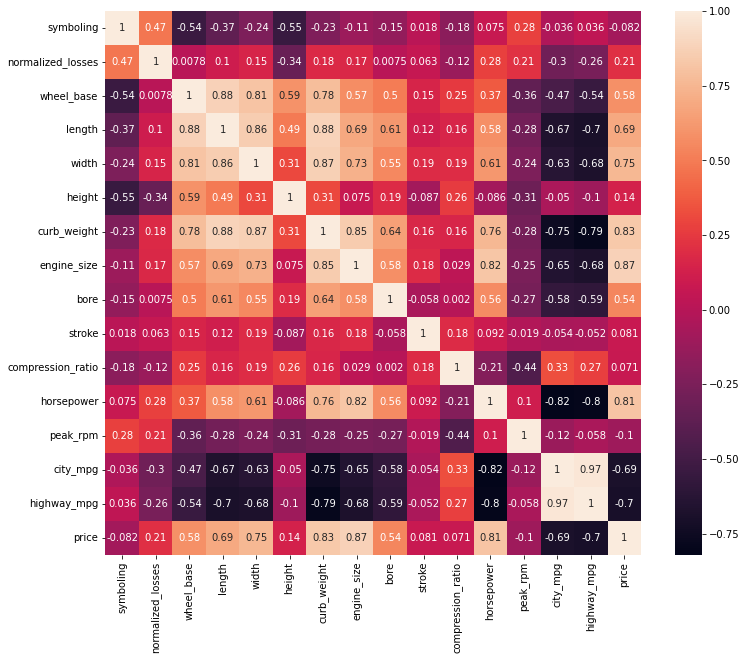

In [8]:
corr_df = car_df.corr(method='pearson')

plt.figure(figsize=(12,10))
sns.heatmap(corr_df, annot=True)
plt.show()

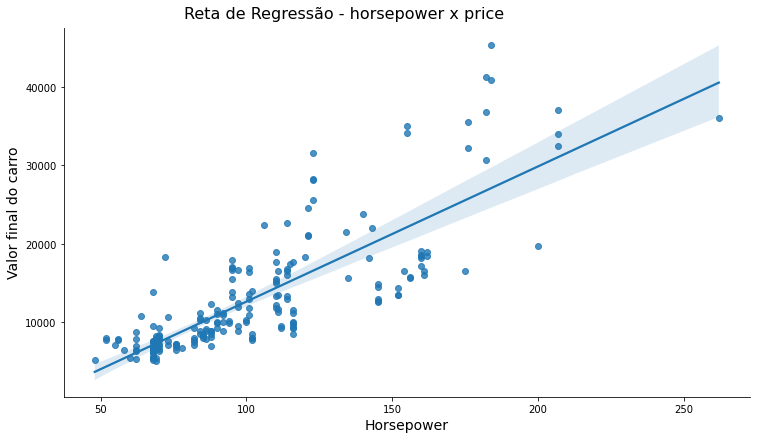

In [9]:
ax = sns.lmplot(x = "horsepower", y = "price", data=car_df)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Reta de Regressão - horsepower x price', fontsize=16, y=1.02)
ax.set_xlabels("Horsepower", fontsize =14)
ax.set_ylabels("Valor final do carro", fontsize=14)
print(ax)


**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:**

<hr>

***Cenário 1***
<p>De acordo com os dados analisados, notamos que o valor final do veículo e diretamente afetado por variáveis como: 
<ul>
    <li>engine_size</li>
    <li>bore</li>
    <li>stroke</li>
    <li>compression_ratio</li>
    <li>curb_weight</li>
</ul>
<b>Como hoursepower é uma unidade de medida para nivelar o potência do carro podemos representar o coluna influênciando diretamente no valor final do veículo</b>
<hr>
    
***Cenário 2***
<ul>
    <li>city_mpg</li>
    <li>highway_mpg</li>
    <li>fuel_type</li>
</ul>
<b>Como a principal fonte de energia dos veículos são preços variáveias de acordo com a economia, encontrar um veículo que tenha uma boa eficiência de miles per gallon(MPG) afeta diretamente no valor final do veículo</b>
<hr>
    
***Cenário 3***

<b>Como cada fabricante tem seus respectivos público alvos e fatia de mercado o a coluna make tem uma importância relevante que afeta no valor final do veículo</b>

## 2. Preparação dos Dados

### Análise de valores inválidos

Faça a análise de dados ausente, dados nulos e dados iguais a 0(zero). **Lembre-se:** Trate esses dados dentro do contexto de análise e justifique suas escolhas.
 

**Resposta:**
<p>
    Idêntificamos a existência de dados igual a zero na column symboling porém ele entra dentro de uma escala plausível de classificação da tabela, foi análisado nas colunas restantes, más todas com respectivos valores inseridas corretamente não destoando o dataset.
</p>

In [10]:
#Seu Código aqui...
for v2 in car_df:
    print(car_df[v2].value_counts())

 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
161    16
168     9
128     9
91      8
150     7
134     6
104     6
85      5
94      5
65      5
102     5
74      5
103     5
122     5
115     5
95      5
149     4
137     4
118     4
110     4
129     4
106     4
93      4
148     4
139     3
101     3
132     3
154     3
119     3
83      3
140     3
125     3
192     2
197     2
89      2
87      2
158     2
194     2
108     2
81      2
153     2
164     2
113     2
145     2
188     2
133     1
90      1
256     1
78      1
77      1
121     1
186     1
141     1
98      1
231     1
105     1
107     1
142     1
Name: normalized_losses, dtype: int64
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              

In [11]:
# Análise caso existe valor 0 dentro do dataset
car_df.where(car_df == 0 | car_df.isnull() | car_df.isna()).count()

symboling              65
normalized_losses       0
make                    0
fuel_type               0
aspiration              0
number_of_doors         0
body_style              0
drive_wheels            0
engine_location         0
wheel_base              0
length                  0
width                   0
height                  0
curb_weight             0
engine_type             0
number_of_cylinders     0
engine_size             0
fuel_system             0
bore                    0
stroke                  0
compression_ratio       0
horsepower              0
peak_rpm                0
city_mpg                0
highway_mpg             0
price                   0
dtype: int64

### __(BONUS: 1 ponto extra.)__ Análise de Outliers

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

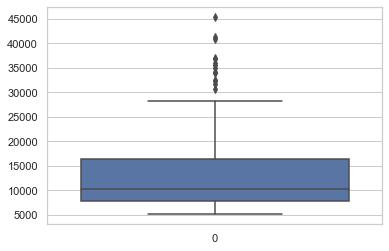

In [12]:
#Seu Código aqui...
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=car_df['price']);

In [13]:
mean = np.mean(car_df['price'], axis=0) #valor médio
sd = np.std(car_df['price'], axis=0) #devio padrão
print(mean)
print(sd)

13207.129353233831
7927.272870751161


In [14]:
#Limite superior
ls = mean + 2 * sd
ls

29061.67509473615

In [15]:
#Limite Inferior
li = abs(mean - 2 *sd)
li

2647.4163882684898

In [16]:
outliersSuperior=[]
for x in car_df['price']:
    if(x > ls):
        outliersSuperior.append(x)

In [17]:
outliersInferior=[]
for x in car_df['price']:
    if(x < li):
        outliersInferior.append(x)

In [18]:
outliersSuperior

[30760,
 41315,
 36880,
 32250,
 35550,
 36000,
 31600,
 34184,
 35056,
 40960,
 45400,
 32528,
 34028,
 37028]

In [19]:
outliersInferior

[]

In [20]:
outliers=[]
def find_outliers(data_set):
    corte_dp = 2
    media = np.mean(data_set)
    print(media)
    dp =np.std(data_set)
    
    
    for dado in data_set:
        z_score = (dado - media)/dp 
        
        if np.abs(z_score) > corte_dp:
            
            outliers.append(dado)
        
    return outliers

In [21]:
outliers = find_outliers(car_df['price'])
outliers

13207.129353233831


[30760,
 41315,
 36880,
 32250,
 35550,
 36000,
 31600,
 34184,
 35056,
 40960,
 45400,
 32528,
 34028,
 37028]

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (removidos ou mantidos)? 

**Resposta:**

Com base nos dados coletados foi identificado outlier superiores, como o dataframe é composto com diversificação de marcas para cada segmentos de público, não comprometendo a acurácia do dataframe, assim os dados serão mantidos. Para análise dos outliers a técnica utilizada foi aplicando conceitos como:
<ul>
    <li>Média é soma de todos os valores dividido pela quantidade dos mesmos;</li>
    <li>Amplitude é a diferença do menor e do maior valor</li>
    <li>Desvio Padrão é uma medida de dispersão que visa identificar o quanto o dataset é uniforme.</li>
</ul>

### Tratamento de dados Paramétricos

Faça o tratamento dos atributos não numéricos. Descubra quais são os atributos não numéricos, faça a análise dos valores desses atributos e manipule de forma conveniente para ser interpretado como um dado numérico. 

In [22]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['make', 'fuel_type', 'aspiration', 'number_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'number_of_cylinders', 'fuel_system'])

encode_df = encoder.fit_transform(car_df)


    

/Volumes/Arquivos/Projetos/jupyter/notebook/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [23]:
encode_df

,symboling,normalized_losses,make_1,make_2,make_3,make_4,make_5,make_6,make_7,make_8,...,fuel_system_7,fuel_system_8,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,1,0,0,0,0,0,0,0,...,0,0,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,1,0,0,0,0,0,0,0,...,0,0,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,1,0,0,0,0,0,0,0,...,0,0,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,0,1,0,0,0,0,0,0,...,0,0,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,0,1,0,0,0,0,0,0,...,0,0,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,0,0,0,0,0,0,0,0,...,0,0,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,0,0,0,0,0,0,0,0,...,0,0,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,0,0,0,0,0,0,0,0,...,0,0,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,0,0,0,0,0,0,0,0,...,1,0,3.01,3.40,23.0,106,4800,26,27,22470


**Pergunta:** Quais são os atributos não numéricos? Qual o método de análise adotado? Por que esse essa escolha? 

**Resposta:**
Os atributos não numéricos são:
<ul>
    <li>make</li>
    <li>fuel_type</li>
    <li>aspiration</li>
    <li>body_style</li>
    <li>drive_wheels</li>
    <li>engine_location</li>
    <li>engine_type</li>
    <li>number_of_cylinders</li>
    <li>fuel_system</li>
    <li>number_of_doors</li>
</ul>
Método utilizado para classificação dos atributos

```{code-cell} ipython3
car_df.info()
```

Definimos a escolha dele pois classifica de maneira clara os dados contidos no dataset

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para a determinação do preço de carro? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado
<hr>
<p>
    A aplicação do aprendizado supervisionado para determininação do preço do carro, pois temos um datasets com dados rotulados e já temos claro qual nosso saída de dado (price), mantendo a relação de variável dependente com os rótulos independentes com intuíto da predicação do valor final do veículo.
</p>
   

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 3 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo : LinearRegression
2. algoritimo : GradientBoostingRegressor
3. algoritimo : KNeighborsRegressor


**Pergunta:** Explique como cada algoritmo funciona.



**Resposta:**

1. LinearRegression: Linear Regression funciona de forma a traçar um reta que com base no cálculo para minimizar a soma residual dos quadrados entre os alvos observados no conjunto de dados e os alvos previstos pela aproximação linear, após várias tentativas de diminuir a soma residual é definida aquele de dizer menor soma residual para todas as marcações do dataframe.
2. GradientBoostingRegressor: Ele inícia utilizando árvores de decisão como base porém a árvore funciona muito bem quando usamos dados para criar as árvores, porém não são flexíveis o suficiente para classificar novas amostras de dados, utilizando assim o Random Forest para auxiliar nessa necessidade, más antes de iniciar a classificação é necessário utilizar amostra de bootstrap criando várias árvores com um sub conjuntos de variáveis de ramificações aleatórias com base nos dados de um tupla do dataset repetindo até o fim do dataset, assim criando diversas Random Forest, com base na etapa anterior AdaBoost responsável pelo criar stumps que tem propriedades de serem baseados no stump anterior e alguns acabam se destacando na classificação, assim criando um base igualdade para todos os stump(1/n), por fim a utilização gradient boost em conjunto com todas as libs consistem em aumentar o gradient inicializando uma folha de dado da stump representando uma estimativa inicial dos dados classificados pelo adaboost, ela inicia utilizando valor médio aumentando o gradiente ela constrói um árvore baseando-se nos erros de cometidos na etapa anterior, assim conseguindo criar árvores maiores que o stump e fazendo o ciclo com base na anterior, assim utilizando as novas árvores para prever os valores.
3. KNeighborsRegressor: É um algoritmo de reconhecimento de padrão podemos utilizar tanto em regressão quanto em classificação consiste pegar o k conjunto utilizando a classificação espaço de features entre seus neighbors

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo.

In [24]:
df = car_df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg','bore','stroke', 'compression_ratio', 'price']]

y = df['price']
X = df.drop(['price'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 7), (41, 7), (160,), (41,))

Divida o subset em conjunto de treinamento e teste.

## 4. Treinamento e teste do modelo

Faça o treinamento e teste de dos 3 algoritmos escolhidos. Para cada um dos modelos utilize uma das métricas: R2-score, RMSE e MAE para avaliar a performance dos medelos. Utilize a média do obtido da validação cruzada para um kfold de 5.

### Algoritmo 1

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2s

lr = LinearRegression()
lr.fit(X_train,y_train)
pred_1 = lr.predict(X_test)
score_1 = r2s( y_test, pred_1 )

In [27]:
score_1

0.7720593039790229

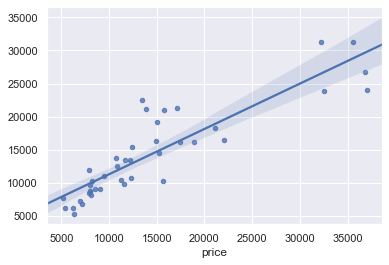

In [28]:
sns.set_theme(color_codes=True)
gra = sns.regplot(x=y_test,y=pred_1, scatter_kws={"s": 20}, truncate=False)

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [30]:
kfold  = KFold(n_splits=5, shuffle=True) # shuffle = True embaralhar 
result = cross_val_score(lr, X_train, y_train, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

K-Fold (R^2) Scores: [0.72454466 0.77462091 0.58889424 0.77207813 0.90050636]
Mean R^2 for Cross-Validation K-Fold: 0.7521288628216674


### Algoritmo 2

In [31]:
#Seu Código aqui...
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2s

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
pred_2 = gbr.predict(X_test)
score_2= r2s(y_test,pred_2)

In [32]:
score_2

0.9258700666348894

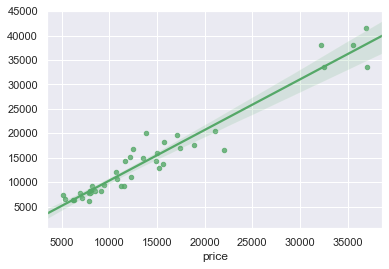

In [33]:
grb = sns.regplot(x = y_test,y = pred_2, color="g", scatter_kws={"s": 20}, truncate=False)


In [34]:
kfold  = KFold(n_splits=5, shuffle=True) # shuffle = True embaralhar 
result = cross_val_score(gbr, X_train, y_train, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

K-Fold (R^2) Scores: [0.92436115 0.84797823 0.90373296 0.90949286 0.87397925]
Mean R^2 for Cross-Validation K-Fold: 0.891908890676234


### Algoritmo 3

In [35]:
#Seu Código aqui...
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score as r2s

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
pred_3 = neigh.predict(X_test)
score_3=r2s(y_test,pred_3)

In [36]:
print(score_3)

0.7018284632178863


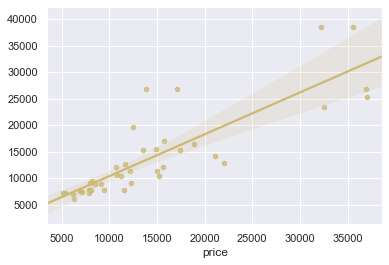

In [37]:
grc = sns.regplot(x = y_test,y = pred_3, color="y", scatter_kws={"s": 20}, truncate=False)


In [38]:
kfold  = KFold(n_splits=5, shuffle=True) # shuffle = True embaralhar 
result = cross_val_score(neigh, X_train, y_train, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

K-Fold (R^2) Scores: [0.41708989 0.73510442 0.62783465 0.76810496 0.80004702]
Mean R^2 for Cross-Validation K-Fold: 0.6696361885069717


**Pergunta:** Qual foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**
<p>
Um primeiro teve score inicial consistênte porém ao utilizar o kfold distuou da analise, já no segundo algoritmo teve uma acurácia alta de 0.9346 más logo calculando kfold médio de 0.8687 baseado em cada kfold score, no KNN obtivemos o score de 0.7018 e aplicando KFold atingimos o valor de 0.90004
</p>
Acredito que o KNN se destacou mais por conta do algoritmo de quando separa por cinco partes iguais o grande volume de dados estar situado próximo entre si assim não distuando demais respeita as regras do algoritmo, agora como GradientBoostingRegressor que utiliza AdaBoost que são resultado que Decision trees e Random Forest em conjunto que necessáriamente para construção de dados necessidade da uma árvore anterior para atingir os resultados, quando fatiamos em bases menores a precisão em alguns casos acaba diminuindo, assim afetando o resultado final.

## 5. Validação e Otimização do Modelo

Faça a otimização dos modelos, tunning dos hiperparametros, utilize técinicas como **RandomSearchCV** ou **GridSearchCV**.

**Pergunta:** Qual a técnica escolhida? Por que?

**Resposta:**
A técnica definida foi GridSearchCV, como o algoritmo tem como base "implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform" e nosso objetivo e identificar os valores price dos veículos, e o GridSerachCV é utiliza muito em conjuntos de algoritmo de classificação como durante nosso processo implementamos a técnica de regrassão optamos pelo GridSerachCV.

### Algoritmo 1

In [39]:
from sklearn.model_selection import GridSearchCV
linear = LinearRegression()

param={'n_estimators': [1, 10, 100, 1000],
              'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],}

linear_result = GridSearchCV(estimator = linear, param_grid = param, cv = 5, verbose=2, n_jobs = 4)

linear_result


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=4,
             param_grid={'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [1, 10, 100, 1000]},
             verbose=2)

In [40]:
linear.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

### Algoritmo 2

In [41]:
from sklearn.model_selection import GridSearchCV
gradient = GradientBoostingRegressor()

param = {'n_estimators': [1, 10, 100, 1000]}

gradient_result = GridSearchCV(estimator = gradient, param_grid = param, cv = 5, verbose=2, n_jobs = 4)

In [42]:
gradient.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [43]:
gradient_result.fit(X_train, y_train)
res_train = gradient_result.best_score_
res_train

Fitting 5 folds for each of 4 candidates, totalling 20 fits


0.8641418815219879

In [44]:
gradient_result.fit(X_test, y_test)
res_test = gradient_result.best_score_
res_test

Fitting 5 folds for each of 4 candidates, totalling 20 fits


0.7073655679934182

In [45]:
gradient_result.best_params_

{'n_estimators': 100}

### Algoritmo 3

In [46]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()

param = {'n_neighbors': [1, 10, 100, 1000]}
knn_result = GridSearchCV(estimator = knn, param_grid = param, cv = 5, verbose=2, n_jobs = 4)

In [47]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [48]:
knn_result.fit(X_train, y_train)
res_train_knn = gradient_result.best_score_
res_train_knn

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Volumes/Arquivos/Projetos/jupyter/notebook/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Volumes/Arquivos/Projetos/jupyter/notebook/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Volumes/Arquivos/Projetos/jupyter/notebook/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Volumes/Arquivos/Projetos/jupyter/notebook/lib/python3.9/site-packages/sklearn/base.py", line 553, in score
    y_pred = self.predict(X)
  File "/Volumes/Arquivos/Projetos/jupyter/notebook/lib/python3.9/site-packages/sklearn/neighbors/_regression.py", line 208, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Volumes/Arquivos/P

0.7073655679934182

In [49]:
knn_result.fit(X_test, y_test)
res_test_knn = knn_result.best_score_
res_test_knn

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Volumes/Arquivos/Projetos/jupyter/notebook/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Volumes/Arquivos/Projetos/jupyter/notebook/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Volumes/Arquivos/Projetos/jupyter/notebook/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Volumes/Arquivos/Projetos/jupyter/notebook/lib/python3.9/site-packages/sklearn/base.py", line 553, in score
    y_pred = self.predict(X)
  File "/Volumes/Arquivos/Projetos/jupyter/notebook/lib/python3.9/site-packages/sklearn/neighbors/_regression.py", line 208, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Volumes/Arquivos/P

0.728813409495956

In [50]:
knn_result.best_params_

{'n_neighbors': 1}

Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

**Resposta:**

|                     | algoritmo1 | algoritmo2 | algoritmo3 |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      X           |      0.8651                       |   0.7217              |
| teste  |      X            |      0.7217                       |   0.7288              |


**Pergunta:** Qual dos algoritmos obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:** Por conta de falhar no processamento, o algoritmo 2 foi o único que apresentou informações consistentes para análise, após descorbrir os melhores parâmetros utilizamos no nosso grid para tunar nossa resultados do nosso algoritmo e percebemos que não houve melhoria de fato, já no algoritmo 3 houve sim uma melhora porém não muito significante.

### __(BONUS: 1 ponto extra.)__ Implementação do algoritmo otimizado

Configure o modelo selecionado com os parâmetros otimizados obtidos anteriormente.

In [51]:
#Seu Código aqui...



### Modelo de produção: Teste com novos dados

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Defina o teste para um resultado baixo, médio e alto do preço do carro.

In [52]:
#Seu Código aqui...



**Pergunta:** Qual foi o resultado obtido? O resultado está coerente com o esperado?

**Resposta:**

## 6. Conclusões finais

Ufa!!... Chegamos ao final deste projeto. Parabéns! De forma simplificada e completa passamos por todas as etapas de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.

**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Utilizamos algoritmo para regressão obtivemos uma acurácia alta, porém mesmo utilizando um parâmetros para melhoras os resultados não foi muito efetivo.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Para melhorar os resultados poderia refinar melhor os parâmetros de cada algoritmo, testar mais cenário como por exemplo a retirada dos outliers do dataset e comparar os dados com o cenário com eles inseridos, testar algoritmos de classificação para analisar a diferença de precisão com relação aos algoritmo de regressão.

**Pergunta:**: As etapas de desenvolvimento se aplicam para um problema de classificação? Justifique:

**Resposta**: Podemos sim utilizar classificação porém como nosso objetivo é encontrar um método para precificar o valor final de um preço de um veículo, acaba que classificação busca como saída a classificação qualitativa, não se aplicando muito bem para nosso cenário, más o alguns algoritmos de classificação podem ser implementados nesse cenário tranquilamente.